# Lifestyle and Health Risk EDA

In [12]:
#Importing the data for setup!
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("miadul/lifestyle-and-health-risk-prediction")

# print("Path to dataset files:", path)

### Importing the data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE, SelectKBest, chi2
from scipy import stats

df = pd.read_csv('Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')
print(df.head())

   age  weight  height exercise  sleep sugar_intake smoking alcohol married  \
0   56      67     195      low    6.1       medium     yes     yes     yes   
1   69      76     170     high    6.9         high      no      no      no   
2   46     106     153     high    6.6          low     yes      no      no   
3   32      54     186   medium    8.5       medium      no      no      no   
4   60      98     195     high    8.0          low      no      no     yes   

      profession   bmi health_risk  
0  office_worker  17.6        high  
1        teacher  26.3        high  
2         artist  45.3        high  
3         artist  15.6         low  
4        teacher  25.8        high  


### Initial Insights

In [14]:
print('Dataframe Info:')
print('Amount of Rows: ', len(df))
print('Amount of Columns: ', len(df.columns))
print('\nOverall Information:')
print(df.info())

Dataframe Info:
Amount of Rows:  5000
Amount of Columns:  12

Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB
None


In [15]:
print('Value Counts of categorical features:')
print('\n', df['exercise'].value_counts())
print('\n', df['sugar_intake'].value_counts())
print('\n', df['smoking'].value_counts())
print('\n', df['alcohol'].value_counts())
print('\n', df['married'].value_counts())
print('\n', df['profession'].value_counts())
print('\n', df['health_risk'].value_counts())

Value Counts of categorical features:

 exercise
medium    1985
low       1272
high      1000
none       743
Name: count, dtype: int64

 sugar_intake
medium    2511
low       1484
high      1005
Name: count, dtype: int64

 smoking
no     4023
yes     977
Name: count, dtype: int64

 alcohol
no     3741
yes    1259
Name: count, dtype: int64

 married
yes    3018
no     1982
Name: count, dtype: int64

 profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64

 health_risk
high    3490
low     1510
Name: count, dtype: int64


In [16]:
print('Numerical Feature Ranges:')
print(f'Age Range: {df['age'].min()} - {df['age'].max()}')
print(f'Weight Range: {df['weight'].min()} - {df['weight'].max()}')
print(f'Height Range: {df['height'].min()} - {df['height'].max()}')
print(f'Sleep Range: {df['sleep'].min()} - {df['sleep'].max()}')
print(f'BMI Range: {df['bmi'].min()} - {df['bmi'].max()}')

print('\nThe dataframe described:')
df.describe()

Numerical Feature Ranges:
Age Range: 18 - 79
Weight Range: 45 - 109
Height Range: 145 - 199
Sleep Range: 3.0 - 10.0
BMI Range: 11.4 - 51.4

The dataframe described:


,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [17]:
#df.corr cant handle category features, going to adjust them into numerical form so we can get a correlation matrix heatmap
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Data Preprocessing
df['health_risk_int'] = df['health_risk'].apply(lambda x: 1 if 'high' in x else 0)
df['smoking_int'] = df['smoking'].apply(lambda x: 1 if x == 'yes' else 0)
df['alcohol_int'] = df['alcohol'].apply(lambda x: 1 if x == 'yes' else 0)
df['profession'] = df['profession'].astype('category')
df['profession_int'] = le.fit_transform(df['profession'])
df['married_int'] = df['married'].apply(lambda x: 1 if x == 'yes' else 0)

# Define ordinal data type 
ordinal_data = ['none', 'low', 'medium', 'high']
rating_dtype = pd.CategoricalDtype(categories=ordinal_data, ordered=True)
df['sugar_intake'] = df['sugar_intake'].astype(rating_dtype)
df['exercise'] = df['exercise'].astype(rating_dtype)
df['sugar_intake_int'] = df['sugar_intake'].cat.codes
df['exercise_int'] = df['exercise'].cat.codes

# Check the changes
df.info()
print(df['profession'].value_counts())
print(df['profession_int'].value_counts())
print(df['exercise_int'].value_counts())
print(df['exercise'].value_counts())
print(df['sugar_intake_int'].value_counts())
print(df['sugar_intake'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               5000 non-null   int64   
 1   weight            5000 non-null   int64   
 2   height            5000 non-null   int64   
 3   exercise          5000 non-null   category
 4   sleep             5000 non-null   float64 
 5   sugar_intake      5000 non-null   category
 6   smoking           5000 non-null   object  
 7   alcohol           5000 non-null   object  
 8   married           5000 non-null   object  
 9   profession        5000 non-null   category
 10  bmi               5000 non-null   float64 
 11  health_risk       5000 non-null   object  
 12  health_risk_int   5000 non-null   int64   
 13  smoking_int       5000 non-null   int64   
 14  alcohol_int       5000 non-null   int64   
 15  profession_int    5000 non-null   int64   
 16  married_int       5000 n

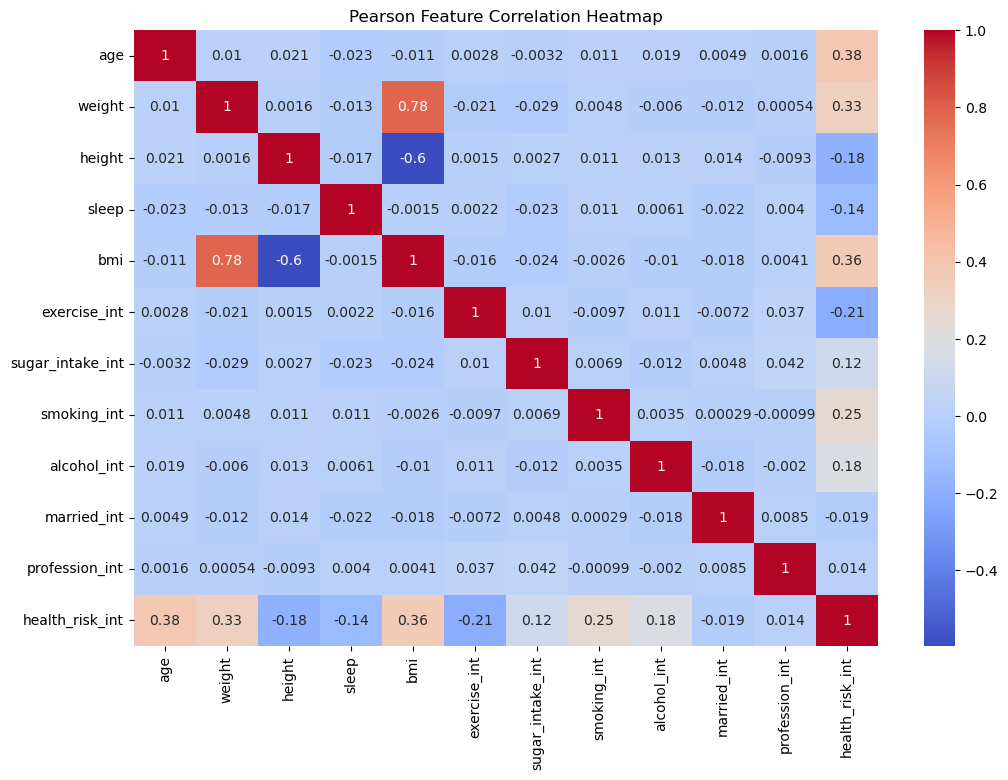

In [18]:
numerical_features = ['age', 'weight', 'height', 'sleep', 'bmi', 'exercise_int', 'sugar_intake_int', 'smoking_int', 'alcohol_int', 'married_int', 'profession_int', 'health_risk_int']
correlation_matrix = df[numerical_features].corr()

#The numbers were overlapping so the figure is 12 by 8
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Feature Correlation Heatmap')
plt.show()

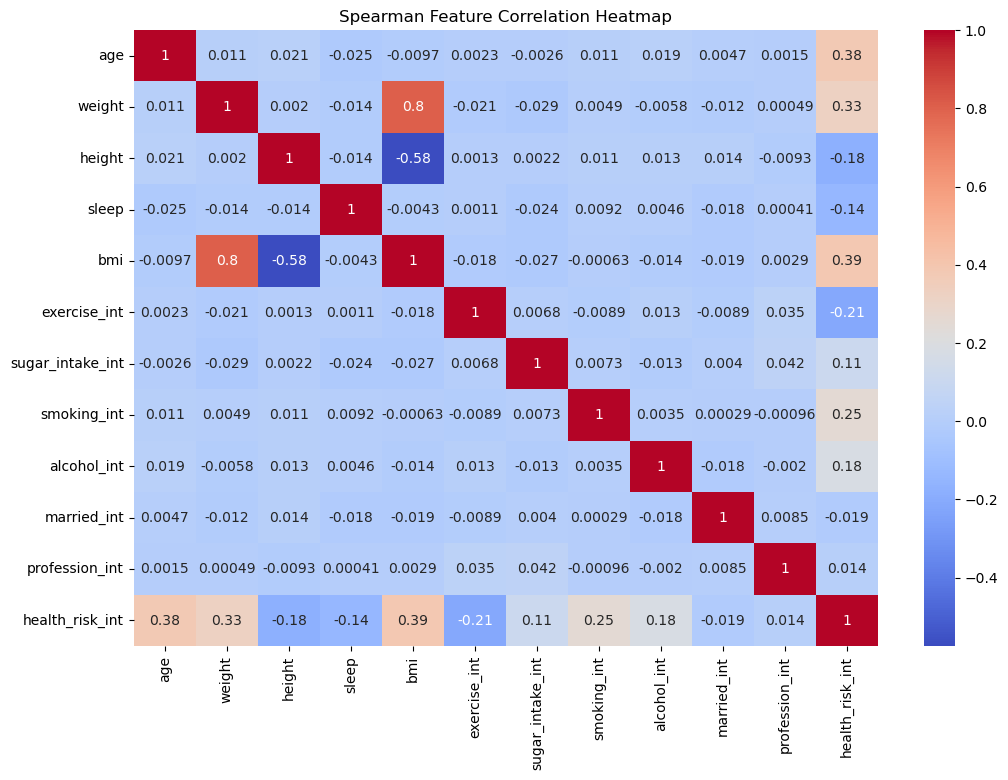

In [19]:
numerical_features = ['age', 'weight', 'height', 'sleep', 'bmi', 'exercise_int', 'sugar_intake_int', 'smoking_int', 'alcohol_int', 'married_int', 'profession_int', 'health_risk_int']
correlation_matrix = df[numerical_features].corr('spearman')

#The numbers were overlapping so the figure is 12 by 8
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Feature Correlation Heatmap')
plt.show()

In [29]:
X = df[['age', 'bmi', 'height', 'weight', 'sleep']] #numerical features check for P values

#Set up the X
X = sm.add_constant(df['age'])

#Target
y = df['health_risk_int']

#Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())
print('\n')

#Set up the X
X = sm.add_constant(df['bmi'])

#Target
y = df['health_risk_int']

#Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())
print('\n')

#Set up the X
X = sm.add_constant(df['height'])

#Target
y = df['health_risk_int']

#Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())
print('\n')

#Set up the X
X = sm.add_constant(df['weight'])

#Target
y = df['health_risk_int']

#Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())
print('\n')

#Set up the X
X = sm.add_constant(df['sleep'])

#Target
y = df['health_risk_int']

#Fit the logistic regression model
model = sm.Logit(y, X).fit()

print(model.summary())
print('\n')

Optimization terminated successfully.
         Current function value: 0.536130
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        health_risk_int   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                  0.1248
Time:                        22:02:36   Log-Likelihood:                -2680.6
converged:                       True   LL-Null:                       -3062.7
Covariance Type:            nonrobust   LLR p-value:                3.284e-168
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5425      0.095    -16.311      0.000      -1.728      -1.357
age            0.0521      0.

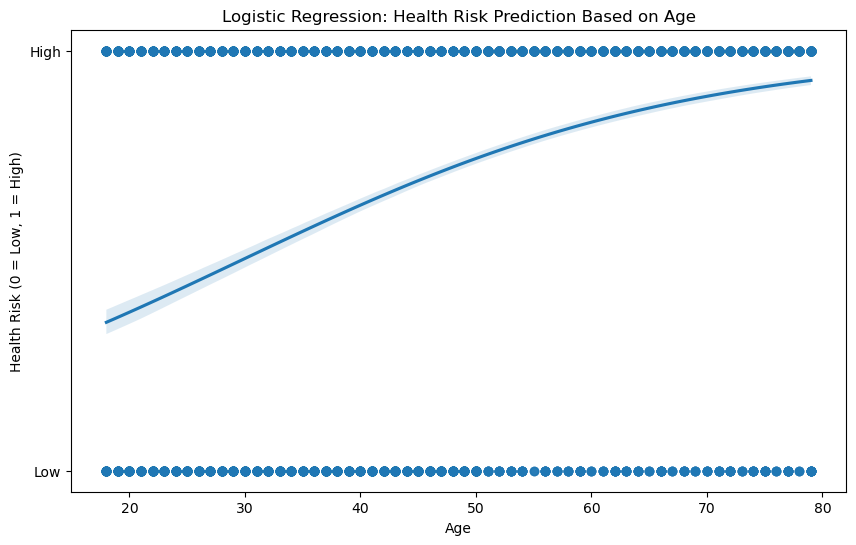

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='health_risk_int', data=df, logistic=True, ci=95)
plt.title('Logistic Regression: Health Risk Prediction Based on Age')
plt.xlabel('Age')
plt.ylabel('Health Risk (0 = Low, 1 = High)')
plt.yticks([0, 1], ['Low', 'High'])
plt.show()


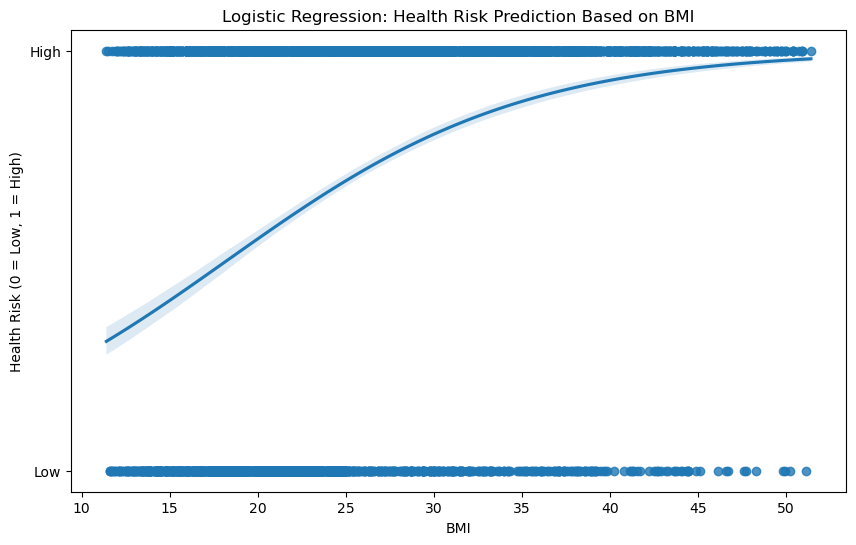

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='health_risk_int', data=df, logistic=True, ci=95)
plt.title('Logistic Regression: Health Risk Prediction Based on BMI')
plt.xlabel('BMI')
plt.ylabel('Health Risk (0 = Low, 1 = High)')
plt.yticks([0, 1], ['Low', 'High'])
plt.show()

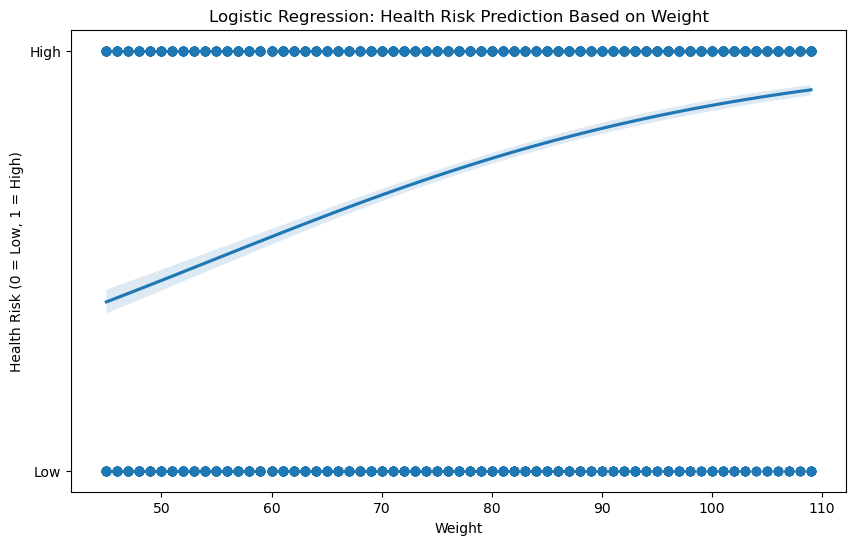

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='weight', y='health_risk_int', data=df, logistic=True, ci=95)
plt.title('Logistic Regression: Health Risk Prediction Based on Weight')
plt.xlabel('Weight')
plt.ylabel('Health Risk (0 = Low, 1 = High)')
plt.yticks([0, 1], ['Low', 'High'])
plt.show()

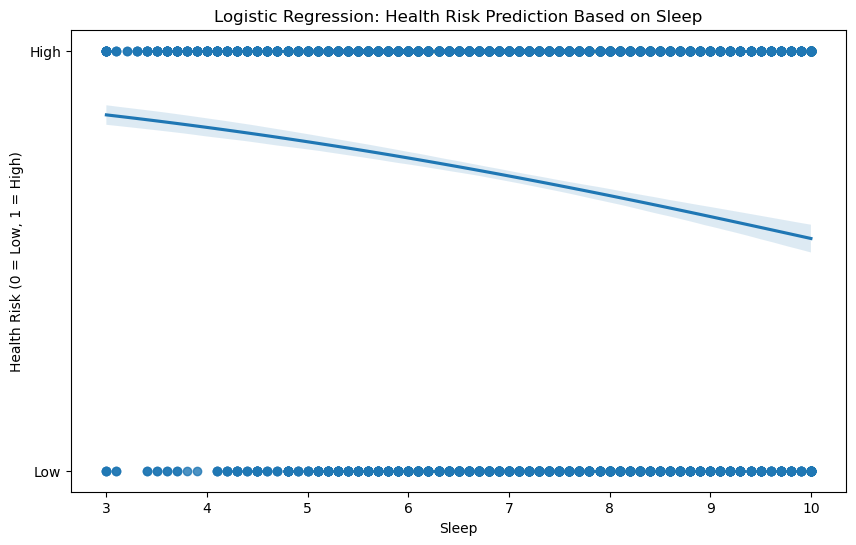

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='sleep', y='health_risk_int', data=df, logistic=True, ci=95)
plt.title('Logistic Regression: Health Risk Prediction Based on Sleep')
plt.xlabel('Sleep')
plt.ylabel('Health Risk (0 = Low, 1 = High)')
plt.yticks([0, 1], ['Low', 'High'])
plt.show()

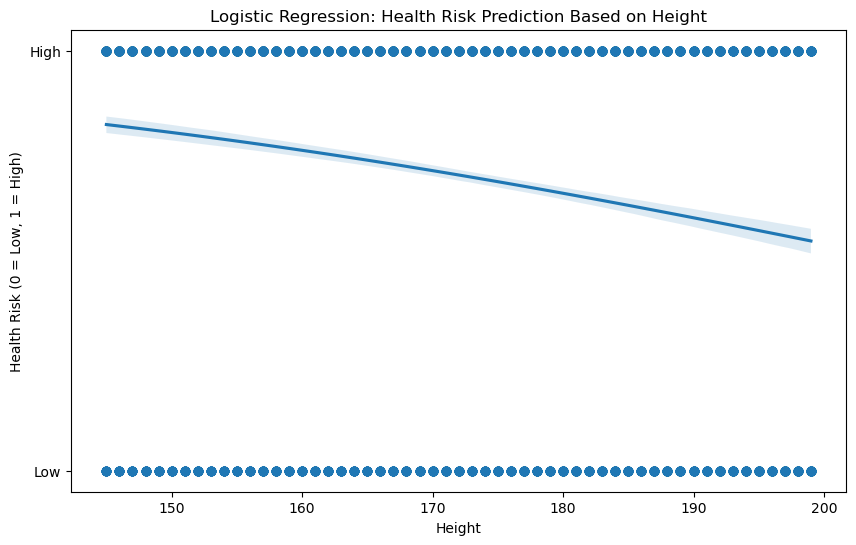

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(x='height', y='health_risk_int', data=df, logistic=True, ci=95)
plt.title('Logistic Regression: Health Risk Prediction Based on Height')
plt.xlabel('Height')
plt.ylabel('Health Risk (0 = Low, 1 = High)')
plt.yticks([0, 1], ['Low', 'High'])
plt.show()

In [ ]:
#Chi Square tests, will return Chi-Square value, p-value, then degrees of freedom

#Significant
contingency_table = pd.crosstab(df['exercise'], df['health_risk'], margins=False)
print('Chi Square exercise and health_risk: ' +
str(stats.chi2_contingency(contingency_table)[0:3]))

#Significant
contingency_table = pd.crosstab(df['sugar_intake'], df['health_risk'], margins=False)
print('Chi Square sugar_intake and health_risk: ' +
str(stats.chi2_contingency(contingency_table)[0:3]))

#Significant
contingency_table = pd.crosstab(df['smoking'], df['health_risk'], margins=False)
print('Chi Square smoking and health_risk: ' +
str(stats.chi2_contingency(contingency_table)[0:3]))

#Significant
contingency_table = pd.crosstab(df['alcohol'], df['health_risk'], margins=False)
print('Chi Square alcohol and health_risk: ' +
str(stats.chi2_contingency(contingency_table)[0:3]))

#Not significant
contingency_table = pd.crosstab(df['married'], df['health_risk'], margins=False)
print('Chi Square married and health_risk: ' +
str(stats.chi2_contingency(contingency_table)[0:3]))

#Not significant
contingency_table = pd.crosstab(df['profession'], df['health_risk'], margins=False)
print('Chi Square profession and health_risk: ' +
str(stats.chi2_contingency(contingency_table)[0:3]))

Chi Square exercise and health_risk: (np.float64(293.1996668082595), np.float64(2.9477919079193036e-63), 3)
Chi Square sugar_intake and health_risk: (np.float64(121.88492693320751), np.float64(3.4121208367755135e-27), 2)
Chi Square smoking and health_risk: (np.float64(318.00413859098626), np.float64(3.9413704353468766e-71), 1)
Chi Square alcohol and health_risk: (np.float64(162.65872142394232), np.float64(2.9701520362975153e-37), 1)
Chi Square married and health_risk: (np.float64(1.759407525985279), np.float64(0.18469843269955952), 1)
Chi Square profession and health_risk: (np.float64(6.452311396552964), np.float64(0.4880350379267824), 7)


             Feature  Rank  Selected
0                age     1      True
4                bmi     1      True
7        smoking_int     1      True
5       exercise_int     2     False
8        alcohol_int     3     False
3              sleep     4     False
6   sugar_intake_int     5     False
1             weight     6     False
2             height     7     False
9        married_int     8     False
10    profession_int     9     False


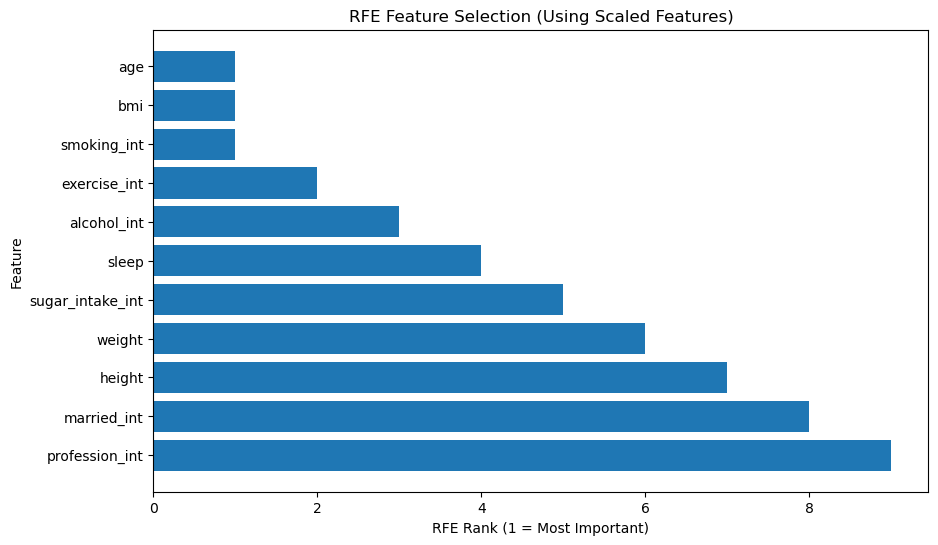

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'weight', 'height', 'sleep', 'bmi', 'exercise_int', 'sugar_intake_int', 'smoking_int', 'alcohol_int', 'married_int', 'profession_int']
np_numerical_features = np.array(numerical_features)
X = df[numerical_features]
y = df['health_risk_int']

classifier = LogisticRegression(max_iter=1800)
#create RFE pipeline - just learned this in machine learning
pipeline = make_pipeline(
    StandardScaler(),
    RFE(classifier, n_features_to_select=3)
)
pipeline.fit(X, y)

rfe_step = pipeline.named_steps['rfe']

#Ranking DataFrame
rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe_step.ranking_,
    'Selected': rfe_step.support_
}).sort_values('Rank', ascending=True)

print(rfe_results)

plt.figure(figsize=(10,6))
plt.barh(rfe_results['Feature'], rfe_results['Rank'])
plt.title('RFE Feature Selection (Using Scaled Features)')
plt.xlabel('RFE Rank (1 = Most Important)')
plt.ylabel('Feature')
plt.gca().invert_yaxis() #Most important at the top please
plt.show()

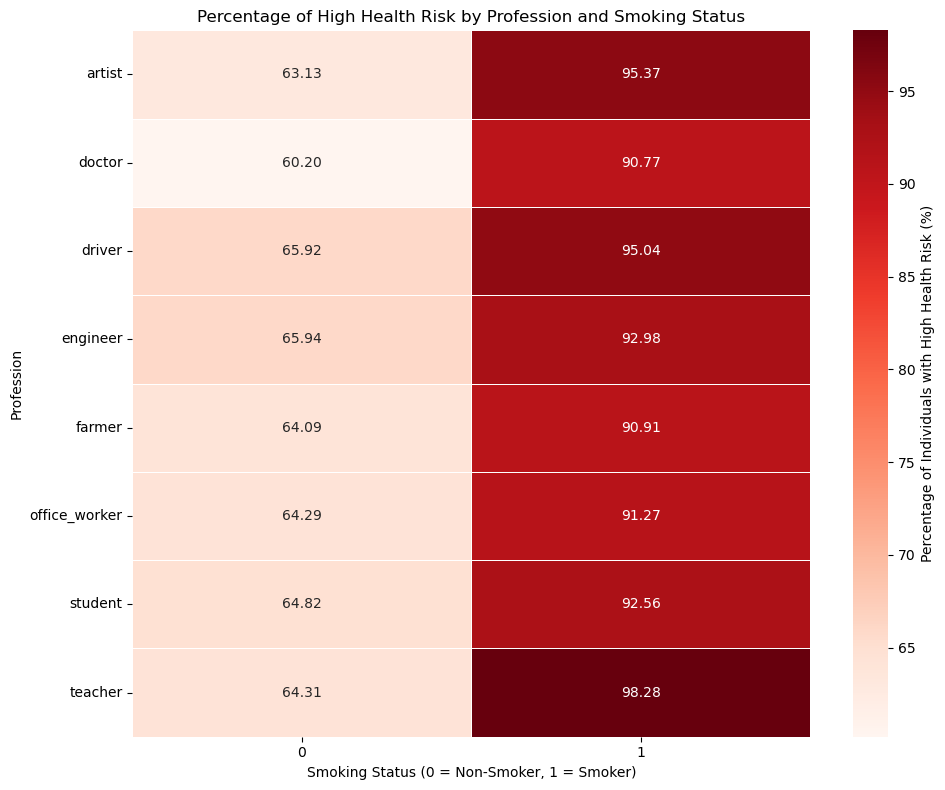

In [70]:
# Create a crosstab to calculate the mean health risk for each profession and smoking status
profession_smoking = pd.crosstab([df['profession'], df['smoking_int']], df['health_risk_int'])
profession_smoking['Total'] = profession_smoking.sum(axis=1)
profession_smoking['High_Risk_Percentage'] = (profession_smoking.get(1, 0) / profession_smoking['Total'])

# Prepare data for heatmap
heatmap_data = profession_smoking['High_Risk_Percentage'].unstack()*100

# Plot the heatmap
plt.figure(figsize=(10, 8)) # Adjusted size slightly for better fit
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f', # Display as percentage with one decimal place (e.g., 63.1)
    cmap='Reds',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage of Individuals with High Health Risk (%)'}
)

# Customize the axis labels and title
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Profession')
plt.title('Percentage of High Health Risk by Profession and Smoking Status')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

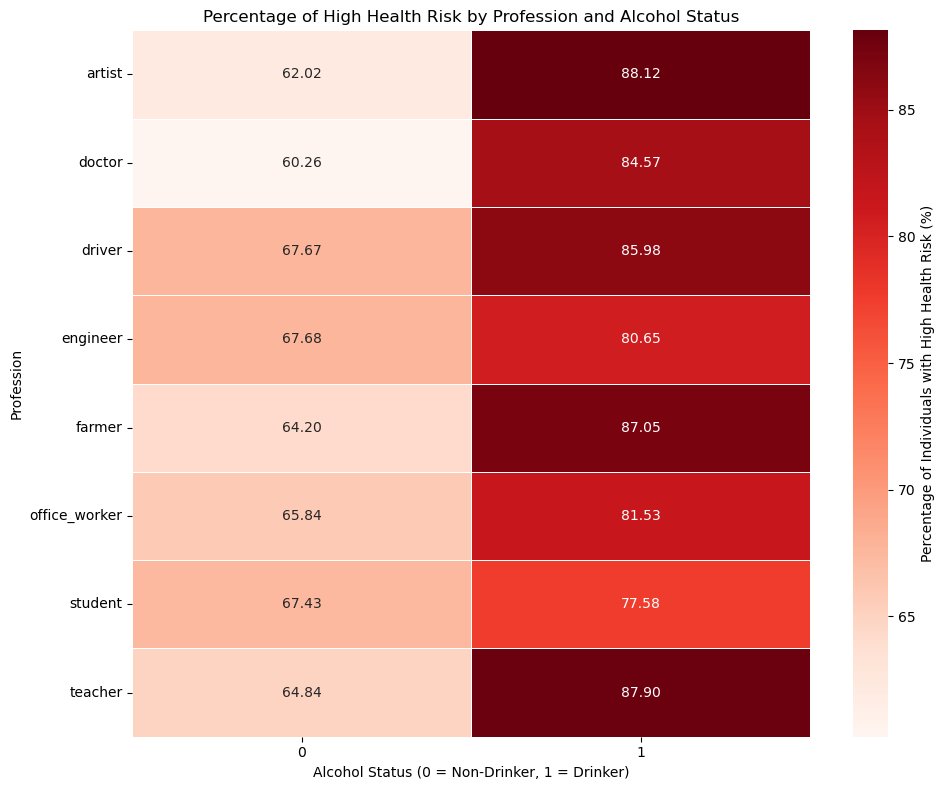

In [71]:
# Create a crosstab to calculate the mean health risk for each profession and smoking status
profession_alcohol = pd.crosstab([df['profession'], df['alcohol_int']], df['health_risk_int'])
profession_alcohol['Total'] = profession_alcohol.sum(axis=1)
profession_alcohol['High_Risk_Percentage'] = (profession_alcohol.get(1, 0) / profession_alcohol['Total'])

# Prepare data for heatmap
heatmap_data = profession_alcohol['High_Risk_Percentage'].unstack()*100

# Plot the heatmap
plt.figure(figsize=(10, 8)) # Adjusted size slightly for better fit
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f', # Display as percentage with one decimal place (e.g., 63.1)
    cmap='Reds',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage of Individuals with High Health Risk (%)'}
)

# Customize the axis labels and title
plt.xlabel('Alcohol Status (0 = Non-Drinker, 1 = Drinker)')
plt.ylabel('Profession')
plt.title('Percentage of High Health Risk by Profession and Alcohol Status')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

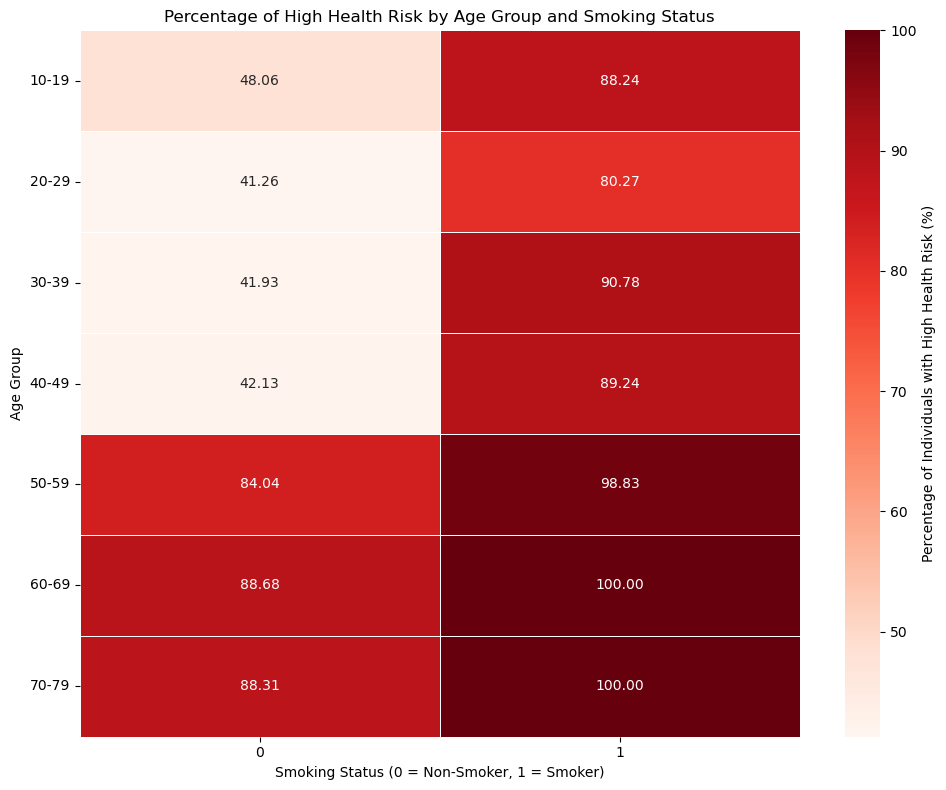

In [72]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['<10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_smoking = pd.crosstab([df['age_group'], df['smoking_int']], df['health_risk_int'])
age_smoking['Total'] = age_smoking.sum(axis=1)
age_smoking['High_Risk_Percentage'] = (age_smoking.get(1, 0) / age_smoking['Total'])
# Prepare data for heatmap
heatmap_data = age_smoking['High_Risk_Percentage'].unstack()*100
# Plot the heatmap
plt.figure(figsize=(10, 8)) # Adjusted size slightly for better fit
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f', # Display as percentage with one decimal place (e.g., 63.1)
    cmap='Reds',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage of Individuals with High Health Risk (%)'}
)
# Customize the axis labels and title
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Age Group')
plt.title('Percentage of High Health Risk by Age Group and Smoking Status')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

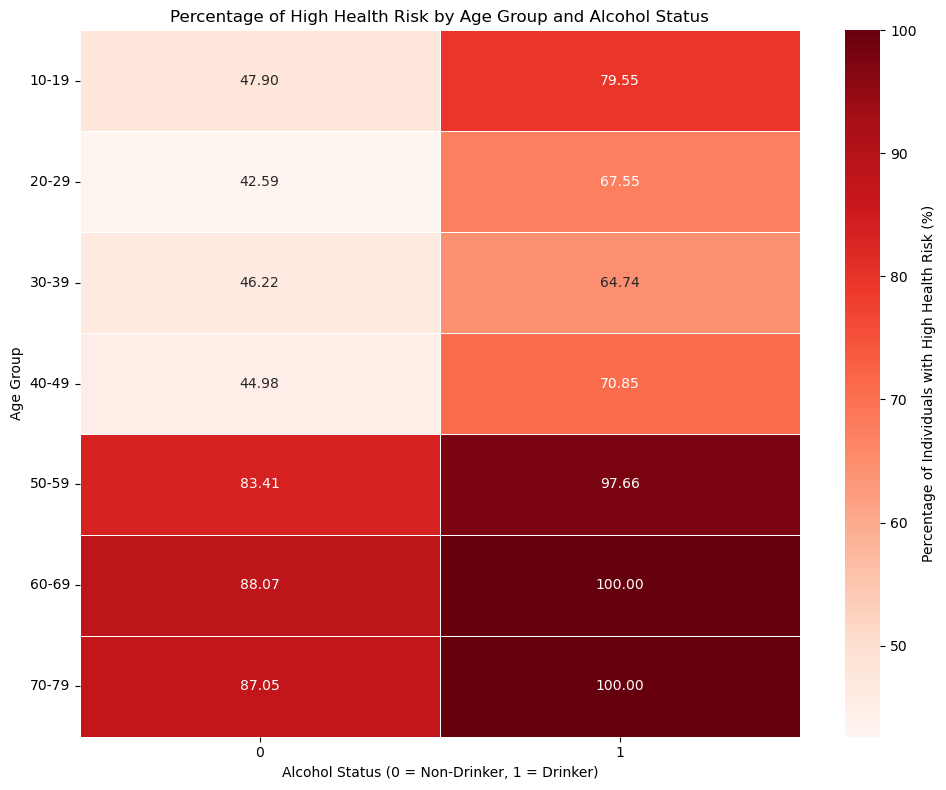

In [73]:
age_drinking = pd.crosstab([df['age_group'], df['alcohol_int']], df['health_risk_int'])
age_drinking['Total'] = age_drinking.sum(axis=1)
age_drinking['High_Risk_Percentage'] = (age_drinking.get(1, 0) / age_drinking['Total'])
# Prepare data for heatmap
heatmap_data = age_drinking['High_Risk_Percentage'].unstack()*100
# Plot the heatmap
plt.figure(figsize=(10, 8)) # Adjusted size slightly for better fit
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f', # Display as percentage with one decimal place (e.g., 63.1)
    cmap='Reds',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage of Individuals with High Health Risk (%)'}
)
# Customize the axis labels and title
plt.xlabel('Alcohol Status (0 = Non-Drinker, 1 = Drinker)')
plt.ylabel('Age Group')
plt.title('Percentage of High Health Risk by Age Group and Alcohol Status')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

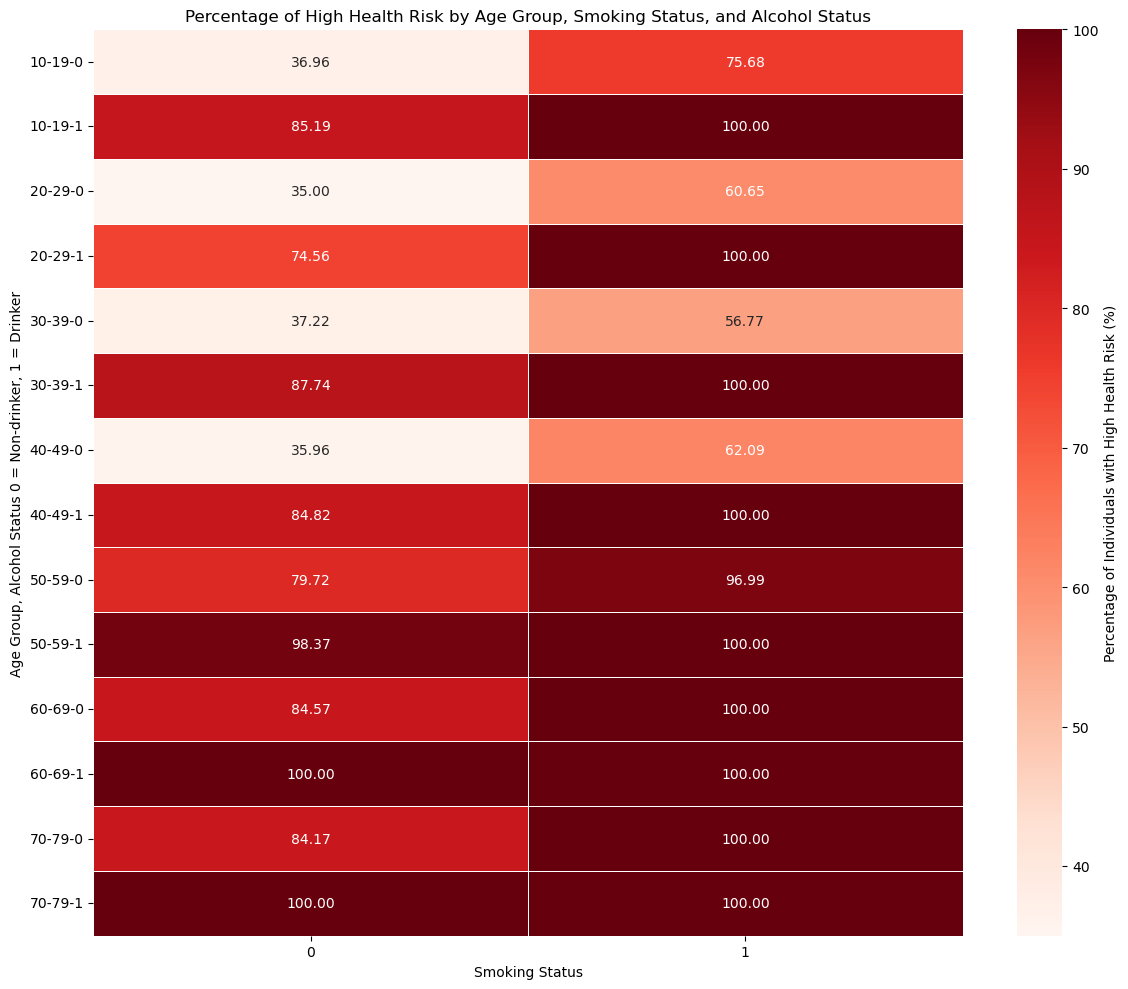

In [74]:
age_smoking_alcohol = pd.crosstab([df['age_group'], df['smoking_int'], df['alcohol_int']], df['health_risk_int'])
age_smoking_alcohol['Total'] = age_smoking_alcohol.sum(axis=1)
age_smoking_alcohol['High_Risk_Percentage'] = (age_smoking_alcohol.get(1, 0) / age_smoking_alcohol['Total'])

# Prepare data for heatmap
heatmap_data = age_smoking_alcohol['High_Risk_Percentage'].unstack()*100
# Plot the heatmap
plt.figure(figsize=(12, 10)) # Adjusted size slightly for better fit
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f', # Display as percentage with one decimal place (e.g., 63.1)
    cmap='Reds',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage of Individuals with High Health Risk (%)'}
)
# Customize the axis labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Age Group, Alcohol Status 0 = Non-drinker, 1 = Drinker')
plt.title('Percentage of High Health Risk by Age Group, Smoking Status, and Alcohol Status')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()